In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('data_000637.txt')
data.head(5)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25


In [3]:
#2) #since we have a high number of rows (i.e. data), we can suppose that some orbit has the max number of bx_count

bx_count = data['BX_COUNTER'].max() + 1 # +1 because we are counting from 0

print('Maxn° of bx in a orbit:', bx_count)

Maxn° of bx in a orbit: 3564


In [9]:
#3,4) 

data['TIME_NS'] = data['TDC_MEAS']*25/30 + data.BX_COUNTER*25 + data.ORBIT_CNT*bx_count*25 

elapsed_time = data.TIME_NS.max() - data.TIME_NS.min() 

print('Elapsed time in sec = %.4f s' %(elapsed_time*10e-9))

Elapsed time in sec = 9.8042 s


In [10]:
#5)

data.HEAD = np.random.choice([0, 1], data.shape[0])
data.head(5)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME_NS
0,0,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14


In [11]:
data_1 = data[data.HEAD == 1]

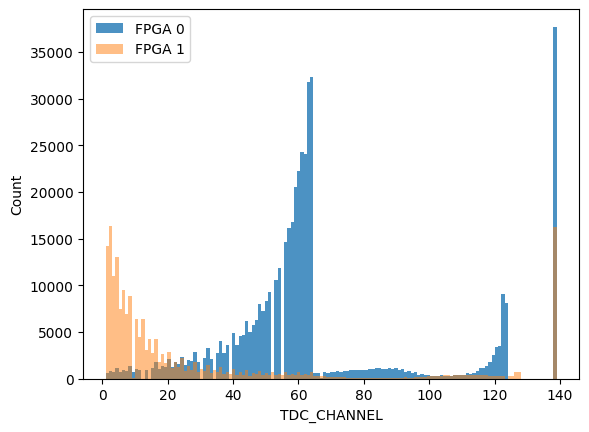

In [14]:
plt.hist(data_1[data_1.FPGA == 0].TDC_CHANNEL, bins=139, alpha=0.8, color='tab:blue', label='FPGA 0')
plt.hist(data_1[data_1.FPGA == 1].TDC_CHANNEL, bins=139, alpha=0.5, color='tab:orange', label='FPGA 1')
plt.legend()
plt.xlabel('TDC_CHANNEL')
plt.ylabel('Count')
plt.show()


In [16]:
chan_max_0 = data_1[data_1.FPGA == 0].groupby(data_1.TDC_CHANNEL).size().sort_values(ascending=False)
chan_max_1 = data_1[data_1.FPGA == 1].groupby(data_1.TDC_CHANNEL).size().sort_values(ascending=False)

print(chan_max_0[:3])
print()
print(chan_max_1[:3])

TDC_CHANNEL
139    37701
64     32276
63     31799
dtype: int64

TDC_CHANNEL
2      16381
139    16262
1      14238
dtype: int64


In [17]:
uni_orbit = data_1.ORBIT_CNT.nunique()

uni_orbit_139 = data_1[data_1.TDC_CHANNEL == 139].ORBIT_CNT.nunique()


print(uni_orbit)
print()
print(uni_orbit_139)

10997

10837


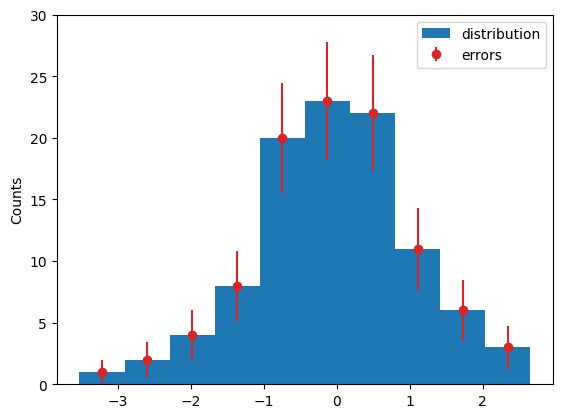

In [50]:
# np.random.seed(9725)
x = np.random.normal(loc=0, scale=1, size=(100,))

counts, bins = np.histogram(x, bins=int(np.sqrt(100)))

bin_center = (bins[:-1]+bins[1:])/2

errors = np.sqrt(counts)

plt.hist(x, bins=bins, label='distribution')
plt.errorbar(bin_center, counts, yerr=errors, fmt='o', color='tab:red', label='errors')
plt.legend()
plt.ylabel('Counts')
plt.yticks(np.arange(-0, (np.max(counts)+np.max(errors))+3,5) )
plt.show()

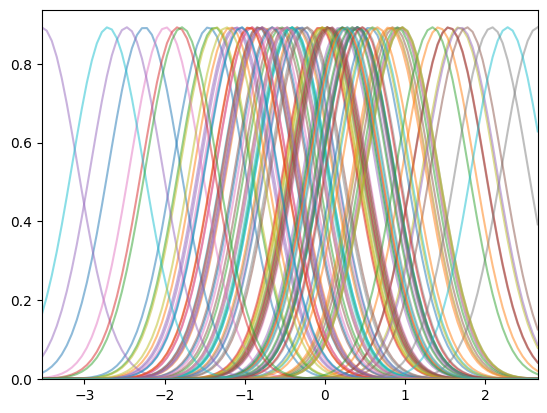

In [51]:
from scipy import stats
means = x
std = 1.06*x.std()*x.size**(-1/5.) 
t = np.linspace(x.min(), x.max(), 100)

gaussians = stats.norm.pdf(t[:, None], loc=means, scale=std).T

for gaus in gaussians:
    plt.plot(t, gaus, alpha=0.5)

plt.xlim(x.min(), x.max())
# plt.xticks(np.arange(int(x.min()), int(x.max()), 5))
plt.ylim(-0.001)
plt.show()

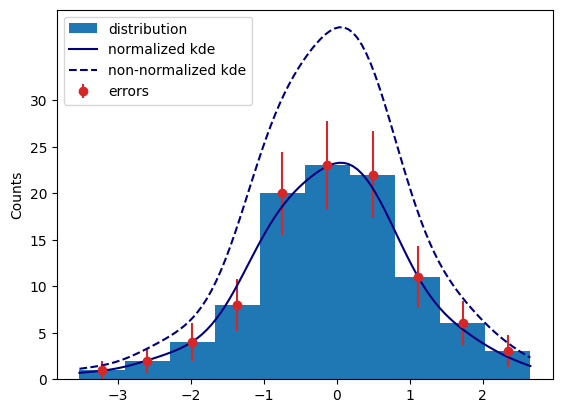

In [52]:
from scipy.integrate import trapz
g_sum = np.sum(gaussians, axis=0)
hist_area = trapz(counts, bin_center)
g_area = trapz(g_sum, t)

A = hist_area/g_area

plt.hist(x, bins=bins, label='distribution')
plt.errorbar(bin_center, counts, yerr=errors, fmt='o', color='tab:red', label='errors')

plt.plot(t, g_sum*A, label='normalized kde', color='navy')
plt.plot(t, g_sum, '--', color='navy', label='non-normalized kde')
plt.legend()
plt.ylabel('Counts')
plt.yticks(np.arange(-0, (np.max(counts)+np.max(errors))+3,5) )
plt.show()

<Axes: xlabel='x1', ylabel='y1'>

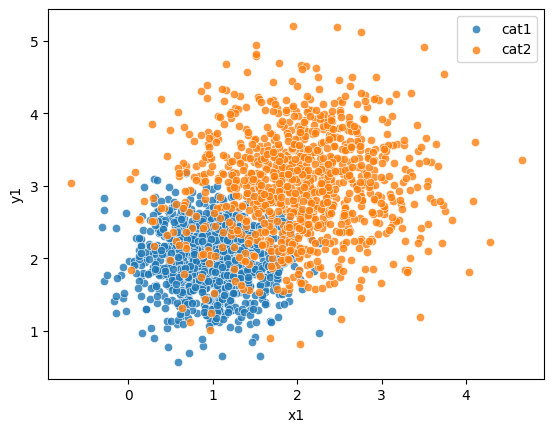

In [71]:
import seaborn as sns
def cat2_dataset(N, mean1, mean2, cov1, cov2):
    cat1 = np.random.multivariate_normal(mean=mean1, cov=cov1, size=N)
    cat2 = np.random.multivariate_normal(mean=mean2, cov=cov2, size=N)

    dataset = pd.DataFrame({'x1': cat1[:,0], 'y1': cat1[:,1], 'x2': cat2[:,0], 'y2': cat2[:,1]})
    return dataset

mean1 = [1, 2]
mean2 = [2, 3]

cov1 = np.diag([0.2, 0.2])
cov2 = np.diag([0.5, 0.5])

N = 1000 

dataset = cat2_dataset(N, mean1, mean2, cov1, cov2)

sns.scatterplot(dataset, x='x1', y='y1', label='cat1', alpha=0.8)
sns.scatterplot(dataset, x='x2', y='y2', label='cat2', alpha=0.8)

In [74]:
data = np.load('residuals_261.npy', allow_pickle=True).item()

df = pd.DataFrame(data)

df.head(3)

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4


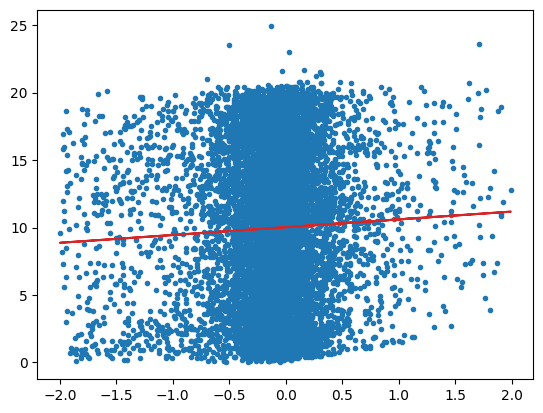

In [82]:
df = df[np.abs(df.residuals) < 2.]

results = stats.linregress(df.residuals, df.distances)

plt.scatter(df.residuals, df.distances, marker='.')
plt.plot(df.residuals, results.intercept + results.slope*df.residuals, color='tab:red', zorder=100)
plt.show()

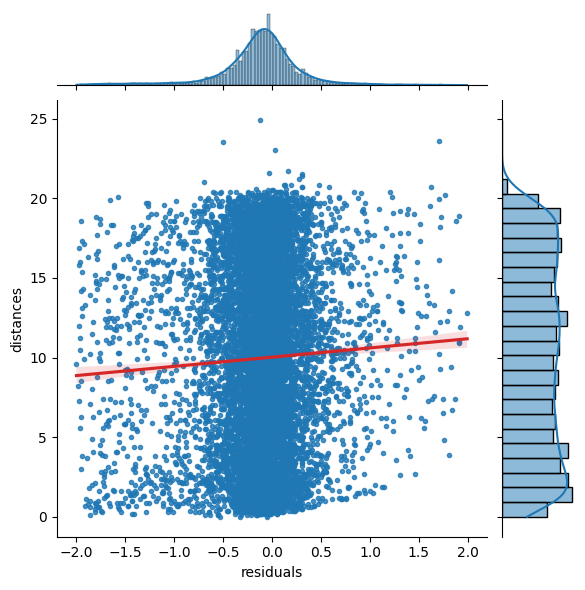

In [94]:
df['regr'] = results.intercept + results.slope*df.residuals
# sns.lineplot(df, x='residuals', y='regr', color='tab:green', zorder=100, linestyle='--')
sns.jointplot(df, x='residuals', y='distances', kind='reg', marker='.', line_kws={'zorder': 100, 'color': 'tab:red'})

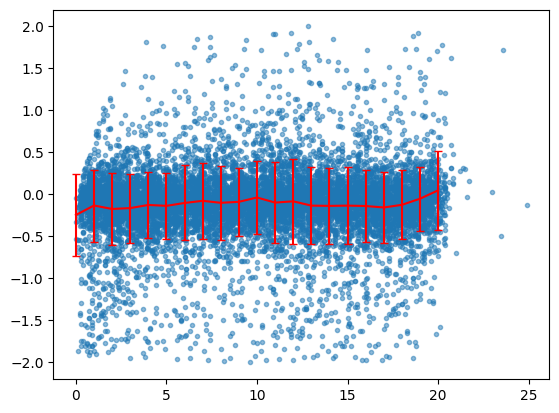

In [104]:
counts_d, bins_d = np.histogram(df.distances, bins=int(np.sqrt(df.shape[0])))

x = (bins_d[:-1]+bins_d[1:])/2
x = np.linspace(0, 20, 21)
y = np.zeros_like(x)
erry = np.zeros_like(x)

for i in range(len(x)):
    y[int(i)] = np.mean(df[(df.distances >=i) & (df.distances < i+1)]['residuals'])
    # y[int(i)] = np.mean(df_clean[(df_clean['distances']>=i) & ( df_clean['distances']< i+1)]['residuals'])

    erry[int(i)] = np.std(df[(df.distances >=i) & (df.distances < i+1)]['residuals'])

plt.errorbar(x, y, erry, color='r', capsize=3, fmt='-')
plt.scatter(df.distances, df.residuals, marker='.', alpha=0.5)
plt.show()